<a href="https://colab.research.google.com/github/maxMitsuya/analise_mercado_imoveis/blob/main/Analise_Mercado_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Regressão Linear para Previsão de Preços de Imóveis

Este projeto tem como objetivo prever o preço de imóveis nos Estados Unidos com base em diversas características, como renda média da área, idade média da casa, número de quartos, número de banheiros e população da área. O modelo de regressão linear foi implementado utilizando a biblioteca scikit-learn em Python. Case de estudo realizado no curso DNC.

## Objetivo de negócio

Problema:
Prever o preço de imóveis nos EUA com base em características como:
- Renda média da região
- Idade média do imóvel
- Número de quartos e banheiros
- População local

Objetivo Principal:
Criar um modelo que ajude corretores e investidores a estimar valores de forma mais precisa.
- Aplicações Práticas:
- Definir preços justos para venda/aluguel
- Identificar imóveis com preço abaixo do mercado (oportunidades)
- Evitar supervalorização em avaliações

## Métricas

- MAE (Mean Absolute Error):
Interpretação direta em dólares (ex: "Nosso modelo erra em média ±$15,000")

- MAPE (Mean Absolute Percentage Error):
"Previsões têm margem de erro média de 12%" - mais intuitivo para stakeholders

- Intervalo de Confiança das Previsões:
Faixa de valores prováveis (ex: "Previsão:
350
k
±
350k±22k com 95% de confiança")

## Perguntas Estratégicas

1. Quais características têm maior correlação com o preço? (usar heatmap)
2. Há outliers que podem distorcer os resultados? (boxplot simples)
3. O modelo erra mais para imóveis baratos ou caros? (gráfico de resíduos)
4. Se aumentarmos o número de banheiros, quanto sobe o preço em média?

##Importando biblioteca

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler


##Carregando os dados

In [4]:
base_casa = pd.read_csv("USA_Housing.csv", sep = ",")
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


##Analisando o dataset

In [5]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


##Análise Exploratória dos Dados (EDA)

### Análise estatística

In [6]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Insights
1. Avg. Area Income (Renda Média da Área):

- Média de 68.583, com desvio padrão de 10.658, indicando que a maioria dos valores está entre 57.925 e 57.925 e 79.241 (1 desvio padrão da média).

- Há uma variação significativa (mínimo de 17.796 e máximo de 17.796, sugerindo áreas com disparidades econômicas.

2. Avg. Area House Age (Idade Média das Casas):

- Média de 5,97 anos, com casas variando de 2,6 a 9,5 anos.

- 25% das casas têm menos de 5,3 anos, enquanto 25% têm mais de 6,6 anos.

3. Avg. Area Number of Rooms (Número Médio de Cômodos):

- Média de 6,99 cômodos, com quartos variando de 3,2 a 10,8.

- 50% das áreas têm entre 6,3 e 7,7 cômodos (intervalo interquartil).

4. Avg. Area Number of Bedrooms (Número Médio de Quartos):

- Média de 3,98 quartos, com mínimo de 2 e máximo de 6,5.

- 75% das áreas têm até 4,5 quartos, indicando que propriedades com mais quartos são menos comuns.

5. Area Population (População da Área):

- Média de 36.163 habitantes, com ampla variação (de 172 a 69.621).

- 25% das áreas têm menos de 29.403 habitantes, enquanto 25% têm mais de 42.861.

6. Price (Preço das Casas):

- Média de 1.232.073, com desvio padrão alto(353.117), refletindo grande variabilidade nos preços.

- O valor mínimo ($15.939) é muito abaixo da média, possivelmente indicando outliers ou propriedades atípicas (ex.: áreas rurais ou em deterioração).

### Análise gráfica

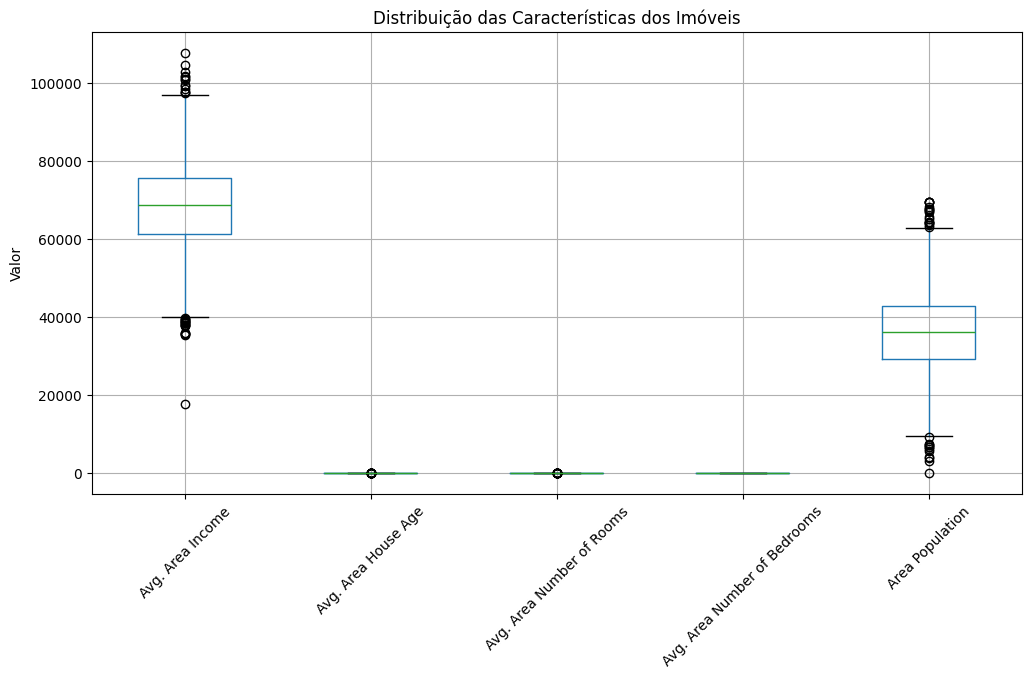

In [7]:
# Boxplots para identificar outliers
plt.figure(figsize=(12,6))
base_casa.drop('Price', axis=1).boxplot()
plt.title('Distribuição das Características dos Imóveis')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Insights

- As colunas Avg. Area Income e Area Population que representam a média de renda e a população, respectivamente, apresentam valores outliers e precisam ser investigados mais detalhamente juntamente com a variável de preços.

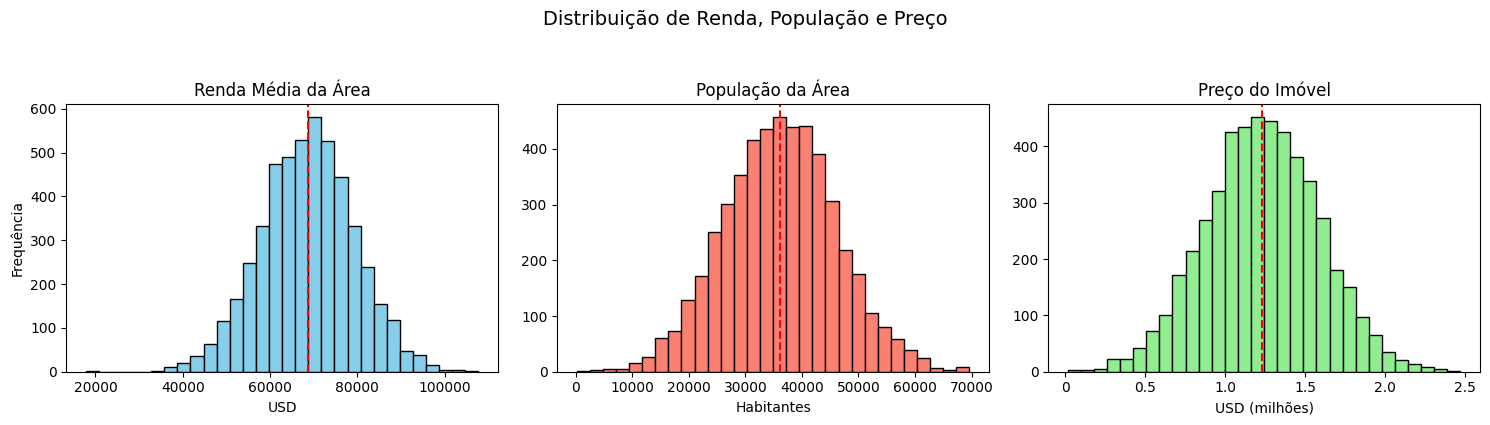

In [8]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograma 1: Avg. Area Income
axes[0].hist(base_casa['Avg. Area Income'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Renda Média da Área')
axes[0].set_xlabel('USD')
axes[0].set_ylabel('Frequência')
axes[0].axvline(base_casa['Avg. Area Income'].mean(), color='red', linestyle='--', label='Média')

# Histograma 2: Area Population
axes[1].hist(base_casa['Area Population'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('População da Área')
axes[1].set_xlabel('Habitantes')
axes[1].axvline(base_casa['Area Population'].mean(), color='red', linestyle='--', label='Média')
axes[1].ticklabel_format(style='plain')  # Remove notação científica

# Histograma 3: Price
axes[2].hist(base_casa['Price'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Preço do Imóvel')
axes[2].set_xlabel('USD (milhões)')
axes[2].set_xticks([0, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6])
axes[2].set_xticklabels(['0', '0.5', '1.0', '1.5', '2.0', '2.5'])
axes[2].axvline(base_casa['Price'].mean(), color='red', linestyle='--', label='Média')

plt.suptitle('Distribuição de Renda, População e Preço', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

Analisando os histogramas de cada variável podemos inferir que:
- A distribuição de renda é assimétrica a direita, com valores mais concentrados entre 40k e 80k, valores acima de 100k são raros mas confirmam a existência de áreas de alta renda;
- A distribuição da população é aproximadamente normal, com pico em ~30k–40k habitantes (média original: 36.1k), valores próximos a 0 podem ser erros ou áreas não habitadas (ex.: parques industriais);
- A distribuição do preço é assimétrica a direita com concentração entre 500mil a 1,5milhões, cauda longa até 2,5milhões indica a presença de imóveis de luxo.

##Pré-processamento

In [9]:
#Ajustando os nomes das colunas
base_casa = base_casa.rename(columns={
    "Avg. Area Income":"renda_area",
    "Avg. Area House Age":"idade_imovel",
    "Avg. Area Number of Rooms":"num_quartos",
    "Avg. Area Number of Bedrooms":"num_banheiros",
    "Area Population":"populacao"})
base_casa.head()

,renda_area,idade_imovel,num_quartos,num_banheiros,populacao,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
#Retirando variável endereço (Address) pois não será necessária na nossa análise
base_casa.drop(["Address"], axis=1, inplace=True)
base_casa.head()

,renda_area,idade_imovel,num_quartos,num_banheiros,populacao,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


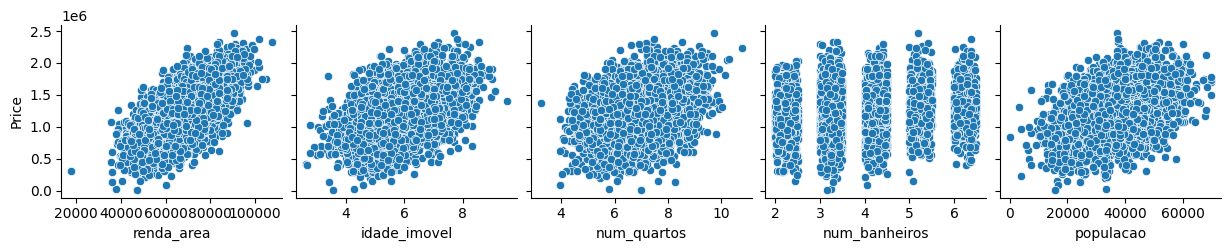

In [11]:
#Análise de dispersão entre variáveis explicativas e variável target
sns.pairplot(base_casa, x_vars=['renda_area', 'idade_imovel', 'num_quartos', 'num_banheiros', 'populacao'], y_vars="Price")

In [12]:
base_casa.corr()

,renda_area,idade_imovel,num_quartos,num_banheiros,populacao,Price
renda_area,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
idade_imovel,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
num_quartos,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
num_banheiros,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
populacao,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

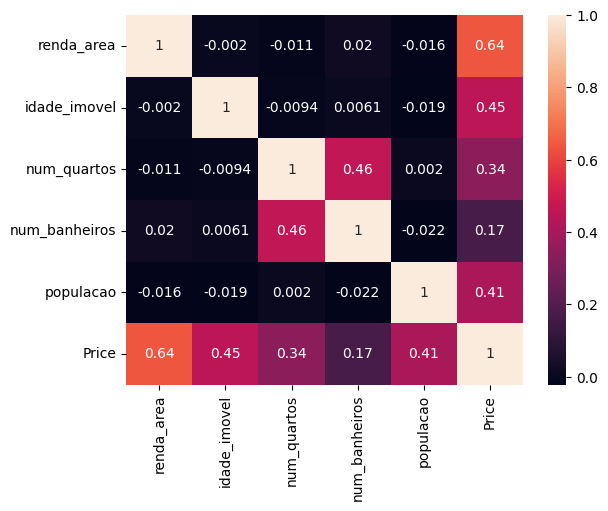

In [13]:
sns.heatmap(base_casa.corr(), annot=True)

Insights
- Todas as variáveis apresentam correlação positiva em relação a variável preço, sendo que renda_area é a variável de maior correlação (0.64) e num_banheiro a de menor correlação (0.17);
- Outra correlação positiva entre as variáveis num_quartos e num_banheiro, ou seja, a quantidade de quartos influência na quantidade de banheiros (coerente).

## Modelagem dos dados

In [14]:
#Seleção das features
features = ['renda_area', 'idade_imovel', 'num_quartos',
           'num_banheiros', 'populacao']
X = base_casa[features]
y = base_casa['Price']

In [15]:
#Normalizando dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [17]:
#Modelagem
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lm.predict(X_test)

In [20]:
print("\n📊 Métricas de Performance:")
print(f"- R²: {r2_score(y_test, y_pred):.2%}")
print(f"- MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")
print(f"- MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2%}")


📊 Métricas de Performance:
- R²: 91.47%
- MAE: $81,136
- MAPE: 7.34%


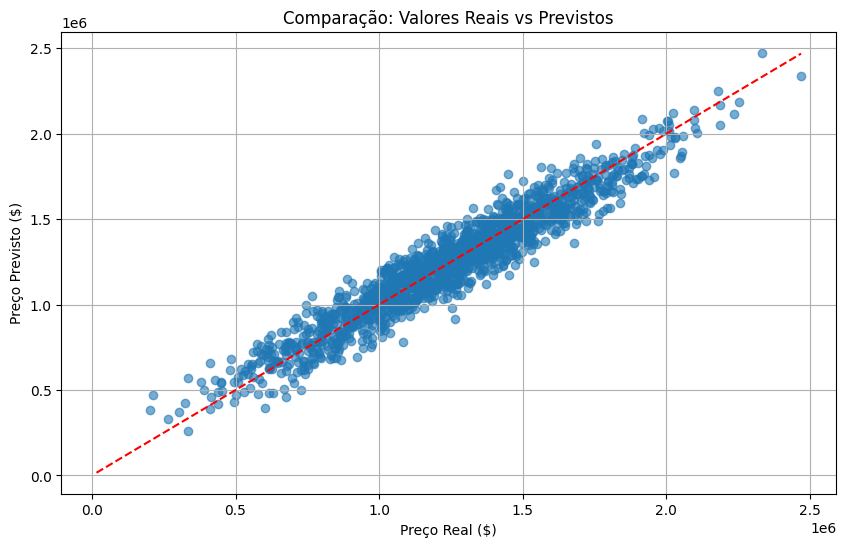

In [21]:
# Gráfico de previsões vs reais
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Preço Real ($)')
plt.ylabel('Preço Previsto ($)')
plt.title('Comparação: Valores Reais vs Previstos')
plt.grid(True)
plt.show()

In [22]:
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lm.coef_,
    'Impacto Relativo': (lm.coef_ / X.mean().values) * 100  # % impacto por unidade
}).sort_values('Coeficiente', ascending=False)

print("\n💰 Impacto das Variáveis no Preço:")
print(coef_df)


💰 Impacto das Variáveis no Preço:
        Variável    Coeficiente  Impacto Relativo
0     renda_area  230464.525202      3.360369e+02
1   idade_imovel  164159.199826      2.746413e+06
4      populacao  151019.358652      4.176014e+02
2    num_quartos  120514.713284      1.724647e+06
3  num_banheiros    2913.624245      7.318218e+04


Insigths
1. Renda da Área (renda_area)
- Coeficiente: $230464 por unidade de renda
- Impacto Relativo: 336.04%

Significado: Para cada 1000 de aumento na renda média da área, o preço do imóvel aumenta aproximadamente 230464. Esta é a variável mais impactante, o que faz sentido econômico - áreas mais ricas têm imóveis mais valiosos.

2. Idade do Imóvel (idade_imovel)
- Coeficiente: $164159 por ano
- Impacto Relativo: 2746413%

Observação: O impacto relativo extremamente alto sugere possível problema na interpretação ou nos dados. Provavelmente precisa de:

- Verificação de escala (a idade está em anos ou décadas?)
- Análise de não-linearidade (talvez idade ao quadrado)

3. População da Área (populacao)
- Coeficiente: $151,019 por unidade de população
- Impacto Relativo: 417.60%

Interpretação: Áreas mais populosas têm imóveis mais valiosos, mas o coeficiente parece alto demais para cada unidade de população. Provavelmente precisa ser escalonado (por 1,000 ou 10,000 habitantes).

4. Número de Quartos (num_quartos)
-Coeficiente: $120,514 por quarto
- Impacto Relativo: 1,724,647%

Análise: Valor extremamente alto para cada quarto adicional. Pode indicar:
- Problema de multicolinearidade (correlação com outras variáveis)
- Necessidade de normalização
- Dados inconsistentes

5. Número de Banheiros (num_banheiros)
- Coeficiente: $2,913 por banheiro
- Impacto Relativo: 73,182%

Insight: O único coeficiente que parece razoável em magnitude. Cada banheiro adicional aumenta o valor em ~$2,900, o que é plausível.